In [1]:
#test

In [20]:
import datetime
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
train = pd.read_csv("train.csv", index_col = 'Id')


In [4]:
train['Date'] = pd.to_datetime(train['Date'], errors = 'coerce')

In [25]:
train.count()

Province_State    13433
Country_Region    31613
Date              31613
ConfirmedCases    31613
Fatalities        31613
dtype: int64

[Text(0, 0, '2020-01-22'),
 Text(0, 0, '2020-01-23'),
 Text(0, 0, '2020-01-24'),
 Text(0, 0, '2020-01-25'),
 Text(0, 0, '2020-01-26'),
 Text(0, 0, '2020-01-27'),
 Text(0, 0, '2020-01-28'),
 Text(0, 0, '2020-01-29'),
 Text(0, 0, '2020-01-30'),
 Text(0, 0, '2020-01-31'),
 Text(0, 0, '2020-02-01')]

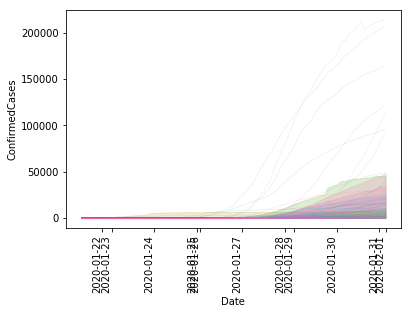

In [26]:
#chart = 
chart = sns.lineplot(x="Date", y="ConfirmedCases", hue="Country_Region", data=train, linewidth = 0.1, legend = False)
x_dates = train["Date"].dt.strftime('%Y-%m-%d').sort_values().unique()
chart.set_xticklabels(x_dates, rotation=90, ha = "right")

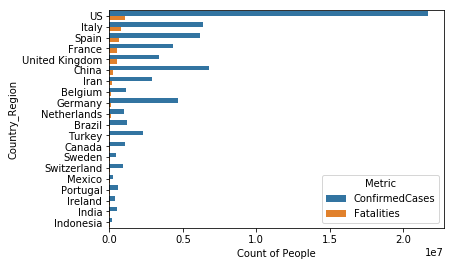

In [57]:
byCountry = train.groupby(by=['Country_Region']).sum() 
topCountries = byCountry.nlargest(20,'Fatalities').reset_index()
#topCountries
#print(topCountries.dtypes)

topCountriesMelted = topCountries.melt("Country_Region", var_name="Metric", value_name="Count of People")
#topCountriesMelted
sns.barplot(y="Country_Region", x="Count of People", hue="Metric", data=topCountriesMelted)